In [50]:
# Importamos librerias para analisis de datos y visualizacion

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sklearn

In [51]:
data=pd.read_csv("properatti_clean.csv")
data.head()

,Unnamed: 0,property_type,place_name,state_name,lat,lon,price_aprox_usd,surface_total_in_m2,rooms,region_name,usd_m2,pileta,parrilla,cochera,gimnasio,baño
0,0,PH,Mataderos,Capital Federal,-34.661824,-58.508839,62000.0,55.0,Sin informacion,caba,1127.272727,0,0,0,0,1
1,2,apartment,Mataderos,Capital Federal,-34.652262,-58.522982,72000.0,55.0,Sin informacion,caba,1309.090909,0,0,0,0,1
2,4,apartment,Centro,Buenos Aires Costa Atlántica,-38.002626,-57.549447,64000.0,35.0,Sin informacion,gran_buenos_aires,1828.571429,0,0,0,0,1
3,6,PH,Munro,Bs.As. G.B.A. Zona Norte,-34.532957,-58.521782,130000.0,106.0,Sin informacion,gran_buenos_aires,1226.415094,0,0,0,0,1
4,7,apartment,Belgrano,Capital Federal,-34.559873,-58.443362,138000.0,45.0,Sin informacion,caba,3066.666667,0,0,0,0,1


In [52]:
data.drop(columns="Unnamed: 0", inplace=True)

In [53]:
data_caba = data.loc[data.region_name == "caba"]
data_caba = data_caba.loc[data_caba.property_type == "apartment"]
data_caba = data_caba.reset_index(drop=True)
data_caba.place_name.value_counts()

Belgrano           2187
Palermo            1978
Caballito          1862
Recoleta           1215
Villa Urquiza      1205
                   ... 
Velez Sarsfield      10
Villa Soldati         8
Villa Real            8
Catalinas             1
Villa Riachuelo       1
Name: place_name, Length: 62, dtype: int64

In [54]:
data_caba[data_caba.place_name == "Catalinas"]

,property_type,place_name,state_name,lat,lon,price_aprox_usd,surface_total_in_m2,rooms,region_name,usd_m2,pileta,parrilla,cochera,gimnasio,baño
514,apartment,Catalinas,Capital Federal,-34.600004,-58.376624,550000.0,300.0,4 o mas ambientes,caba,1833.333333,0,0,0,0,1


In [55]:
#place_drop = data_caba.place_name.value_counts().loc[data_caba.place_name.value_counts().values > 100]
#place_drop = place_drop.index.to_list()
#data_caba = data_caba[data_caba.place_name.isin(place_drop)]
#data_caba.reset_index(inplace=True, drop=True)


In [56]:
data_caba

,property_type,place_name,state_name,lat,lon,price_aprox_usd,surface_total_in_m2,rooms,region_name,usd_m2,pileta,parrilla,cochera,gimnasio,baño
0,apartment,Mataderos,Capital Federal,-34.652262,-58.522982,72000.0,55.0,Sin informacion,caba,1309.090909,0,0,0,0,1
1,apartment,Belgrano,Capital Federal,-34.559873,-58.443362,138000.0,45.0,Sin informacion,caba,3066.666667,0,0,0,0,1
2,apartment,Belgrano,Capital Federal,-34.559873,-58.443362,195000.0,65.0,Sin informacion,caba,3000.000000,0,0,0,0,1
3,apartment,Palermo Soho,Capital Federal,NaN,NaN,111700.0,50.0,1 ambiente,caba,2234.000000,1,0,0,1,1
4,apartment,Palermo Soho,Capital Federal,NaN,NaN,147900.0,42.0,1 ambiente,caba,3521.428571,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21816,apartment,Recoleta,Capital Federal,-34.587425,-58.397372,165000.0,44.0,Sin informacion,caba,3750.000000,0,1,0,0,1
21817,apartment,Belgrano,Capital Federal,-34.563685,-58.442683,410000.0,157.0,Sin informacion,caba,2611.464968,0,0,0,0,1
21818,apartment,Belgrano,Capital Federal,-34.563685,-58.442683,410000.0,157.0,Sin informacion,caba,2611.464968,0,0,0,0,1
21819,apartment,Villa Urquiza,Capital Federal,-34.570639,-58.475596,131500.0,46.0,Sin informacion,caba,2858.695652,0,1,1,0,1


In [57]:
#data_caba.dropna(how="any", inplace=True)
#data_caba.reset_index(inplace=True, drop=True)

In [58]:
from sklearn.preprocessing import OneHotEncoder 

categorias = ["place_name", "rooms", "property_type"]

for feature in categorias:
    onehot = OneHotEncoder(drop = "first")
    X_enc= onehot.fit_transform(data_caba[[feature]]).toarray()
    enc_data = pd.DataFrame(X_enc, columns = onehot.get_feature_names_out())
    data_caba = pd.concat([data_caba.drop(columns=feature), enc_data], axis=1)  

In [59]:
data_caba.drop(columns=[ "state_name", "baño", "region_name", "lat", "lon"], inplace=True)

In [60]:
data_caba

,price_aprox_usd,surface_total_in_m2,usd_m2,pileta,parrilla,cochera,gimnasio,place_name_Agronomía,place_name_Almagro,place_name_Balvanera,...,place_name_Villa Real,place_name_Villa Riachuelo,place_name_Villa Santa Rita,place_name_Villa Soldati,place_name_Villa Urquiza,place_name_Villa del Parque,rooms_2 ambientes,rooms_3 ambientes,rooms_4 o mas ambientes,rooms_Sin informacion
0,72000.0,55.0,1309.090909,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,138000.0,45.0,3066.666667,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,195000.0,65.0,3000.000000,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,111700.0,50.0,2234.000000,1,0,0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,147900.0,42.0,3521.428571,1,0,0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21816,165000.0,44.0,3750.000000,0,1,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21817,410000.0,157.0,2611.464968,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21818,410000.0,157.0,2611.464968,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21819,131500.0,46.0,2858.695652,0,1,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Funciones

In [61]:
def accuracy_model(y_test, ypred, model=""):
    test_acc = accuracy_score(y_test_selec, ypred)
    list_accuracy[model] = round(test_acc,3)
    print("El accuracy es " + str(test_acc))

Funcion!

In [62]:
from sklearn import metrics

scores_mae = {}
scores_mse = {}
scores_rmse ={}
scores_r2 = {}

def scores_regression(X_train, X_test, y_train, y_test, model, modelo=""):
    
    # Fit y prediccion del modelo seleccionado
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train) 
    y_test_pred = model.predict(X_test)

#  MAE:
    
    mae_train = round(metrics.mean_absolute_error(y_train, y_train_pred), 2)
    mae_test= round(metrics.mean_absolute_error(y_test, y_test_pred),2)
    
    scores_mae[(modelo + "_test")] = mae_test
    scores_mae[(modelo + "_train")] = mae_train
          
            
    print ('MAE - TRAIN:', mae_train)
    print ('MAE - TEST:', mae_test)
    print("-"*20 + "\n")  
# MSE

    mse_train = round(metrics.mean_squared_error(y_train, y_train_pred), 2)
    mse_test= round(metrics.mean_squared_error(y_test, y_test_pred),2)
    
    scores_mse[(modelo + "_test")] = mse_test
    scores_mse[(modelo + "_train")] = mse_train
    
    print ('MSE - TRAIN:', mse_train )
    print ('MSE - TEST:', mse_test)
    print("-"*20 + "\n")

# RMSE:

    rmse_train = round(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)), 2)
    rmse_test= round(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)),2)
    
    scores_rmse[(modelo + "_test")] = rmse_test
    scores_rmse[(modelo + "_train")] = rmse_train
    
    print ('RMSE - TRAIN:', rmse_train)
    print ('RMSE - TEST:', rmse_test)
    print("-"*20 + "\n")

#R2

    r2_train = round((metrics.r2_score(y_train, y_train_pred)), 2)
    r2_test= round((metrics.r2_score(y_test, y_test_pred)),2)
    
    scores_r2[(modelo + "_test")] = r2_test
    scores_r2[(modelo + "_train")] = r2_train
    
    print ('R2 - TRAIN:', r2_train)
    print ('R2 - TEST:', r2_test)
    print("-"*20 + "\n")



In [63]:
X = data_caba.drop(columns="usd_m2")
y = data_caba["usd_m2"]

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [66]:
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression


linreg = LinearRegression()
elastic = ElasticNetCV(cv=10, random_state=1)
lasso = LassoCV(cv=10, random_state=1)

In [67]:
scores_regression(X_train_scaler, X_test_scaler, y_train, y_test, elastic, "Elastic")


MAE - TRAIN: 354.51
MAE - TEST: 357.41
--------------------

MSE - TRAIN: 221214.67
MSE - TEST: 222268.62
--------------------

RMSE - TRAIN: 470.33
RMSE - TEST: 471.45
--------------------

R2 - TRAIN: 0.56
R2 - TEST: 0.56
--------------------



In [68]:
scores_regression(X_train_scaler, X_test_scaler, y_train, y_test, linreg, "Linear")

MAE - TRAIN: 276.61
MAE - TEST: 277.07
--------------------

MSE - TRAIN: 152124.04
MSE - TEST: 145015.84
--------------------

RMSE - TRAIN: 390.03
RMSE - TEST: 380.81
--------------------

R2 - TRAIN: 0.69
R2 - TEST: 0.71
--------------------



In [69]:
scores_regression(X_train_scaler, X_test_scaler, y_train, y_test, lasso, "Lasso")

MAE - TRAIN: 276.73
MAE - TEST: 277.19
--------------------

MSE - TRAIN: 152153.99
MSE - TEST: 145047.65
--------------------

RMSE - TRAIN: 390.07
RMSE - TEST: 380.85
--------------------

R2 - TRAIN: 0.69
R2 - TEST: 0.71
--------------------



In [76]:
score_regression = pd.DataFrame({"Modelos": scores_mae.keys(), "MAE": scores_mae.values(), "MSE":scores_mse.values(), "RSME": scores_rmse.values(), "R2": scores_r2.values()})

display(score_regression)

,Modelos,MAE,MSE,RSME,R2
0,Elastic_test,357.41,222268.62,471.45,0.56
1,Elastic_train,354.51,221214.67,470.33,0.56
2,Linear_test,277.07,145015.84,380.81,0.71
3,Linear_train,276.61,152124.04,390.03,0.69
4,Lasso_test,277.19,145047.65,380.85,0.71
5,Lasso_train,276.73,152153.99,390.07,0.69


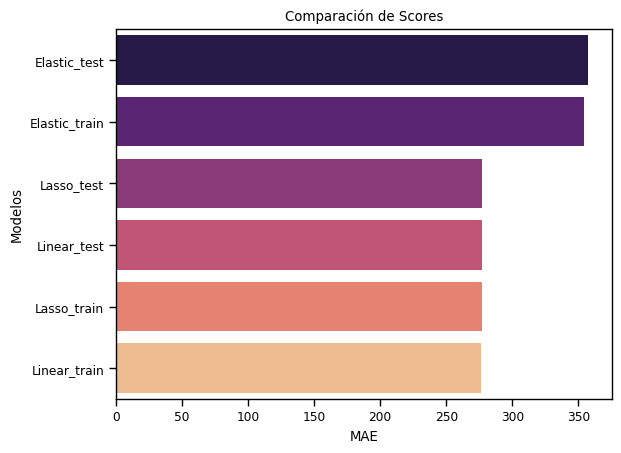

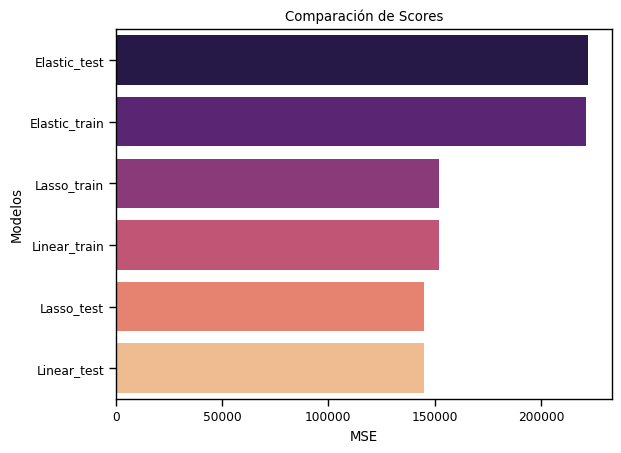

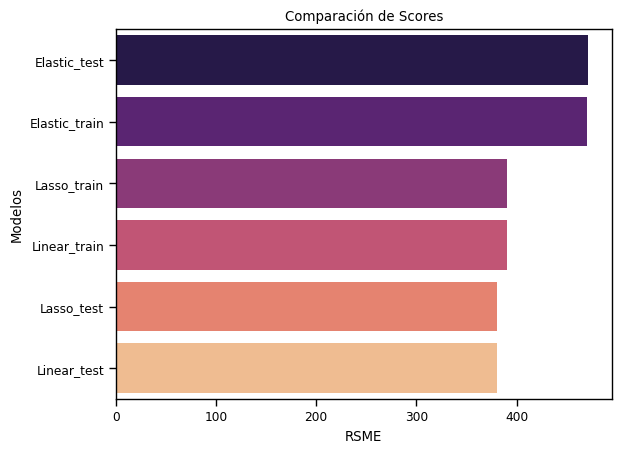

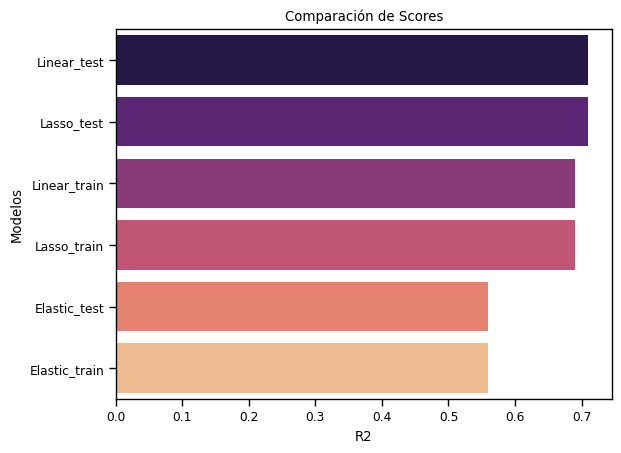

In [103]:
scores_columns= ["MAE", "MSE", "RSME", "R2"]

for scores in scores_columns:
    sns.set_context('paper')
    ax = sns.barplot(x = score_regression[scores] ,y = 'Modelos',data = score_regression.sort_values(by=scores, ascending=False), palette = 'magma')
    ax.set(xlabel=scores, ylabel="Modelos", title="Comparación de Scores")
    plt.show()

In [162]:
# Entrenamos el modelo 

model = linreg.fit(X_train, y_train)

predictions = model.predict(X_test)

In [163]:
# Imprimimos coeficientes

print (linreg.intercept_)
print (linreg.coef_)

2528.4029368627193
[ 265.71601116 -218.4882533    63.27496713   -1.27589781   56.20591826
   63.45828955   -9.24121205  -27.83020941  -51.3948338   -34.24653949
   50.82762636   88.45862407  -47.42513039  -51.20404425  -10.25874086
  -25.8745322    -1.33443948   -9.27901186  -18.16321221    0.64985858
    6.37608893  -42.30597766  -44.77502436  -62.57908899  -41.92756584
   34.13030419  -31.22409021  -31.66365334  -35.96656341  -13.11668247
   46.02018145  -27.84357332   97.60745539   49.12171175   42.82959552
   39.12440256    7.61952188  -15.55486805   -3.88663338  -21.53645873
   -4.06435277  -37.2768513   -17.86150313  -23.41737269   55.18161155
   96.64908228   12.85762122  -19.60209077  -40.54741352  -15.15231473
  -31.98167366  -10.82763085   -0.26638797   -7.07566785   10.46492039
  -11.9430114   -10.58523477  -46.41931343  -27.57772589   -1.68243251
   -9.5895564    -7.20240387    0.           -7.67295623  -14.96568273
   -6.14773334  -19.33480665   -0.36030949  -13.41909993  

In [164]:
# ¿Calculamos métricas a mano? ¡Por supuesto que no!

from sklearn import metrics
import numpy as np
print ('MAE:', metrics.mean_absolute_error(y_test, predictions))
print ('MSE:', metrics.mean_squared_error(y_test, predictions))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print ('R2:', metrics.r2_score(y_test, predictions))

MAE: 357.40949917833274
MSE: 222268.62387756133
RMSE: 471.45373460983564
R2: 0.5611203038651209


In [828]:
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=500, objective='reg:linear', booster='gbtree')
 
#Printing all the parameters of XGBoost
print(RegModel)
 
#Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

print ('MAE:', metrics.mean_absolute_error(y_test, prediction))
print ('MSE:', metrics.mean_squared_error(y_test, prediction))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print ('R2:', metrics.r2_score(y_test, prediction))

XGBRegressor(base_score=None, booster='gbtree', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_delta_step=None, max_depth=3,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, scale_pos_weight=None,
             subsample=None, tree_method=None, validate_parameters=None,
             verbosity=None)
[00:55:28] WARNING: c:\windows\temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 29.344617767246213
MSE: 1740.2817914816658
RMSE: 41.71668480933817
R2: 0.996563732970897